In [42]:
import numpy as np
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import matplotlib.pyplot as plt

In [43]:
vertices = np.array([
 [-1, -1, -1], [1, -1, -1], [1, 1, -1], [-1, 1, -1], [-1, -1, 1], [1, -1, 1], 
 [1, 1, 1], [-1, 1, 1]
])

edges = np.array([
    [0, 1], [1, 2], [2, 3], [3, 0], [4, 5], [5, 6], [6, 7], [7, 4], [0, 4], [1, 5], 
 [2, 6], [3, 7]
])



In [44]:
# translate the cube by [1,1,1]
vertices_translated = vertices + np.array([1,1,1])
# scale the cube by 2
vertices_scaled = vertices * 2


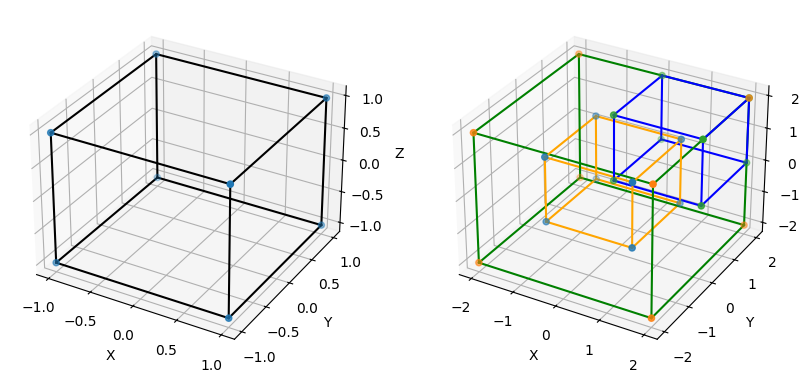

In [47]:
fig = plt.figure(figsize=[10,8])

ax1 = fig.add_subplot(1, 2, 1, projection='3d')
ax2 = fig.add_subplot(1, 2, 2, projection='3d')

# Left plot
ax1.scatter(vertices[:, 0], vertices[:, 1], vertices[:, 2])

# cube edges
for edge in edges:
    ax1.plot(vertices[edge, 0], vertices[edge, 1], vertices[edge, 2], color='black')

ax1.set_xlabel("X")
ax1.set_ylabel("Y")
ax1.set_zlabel("Z")

# Right plot
ax2.scatter(vertices[:, 0], vertices[:, 1], vertices[:, 2])
ax2.scatter(vertices_scaled[:, 0], vertices_scaled[:, 1], vertices_scaled[:, 2])
ax2.scatter(vertices_translated[:, 0], vertices_translated[:, 1], vertices_translated[:, 2])
for edge in edges:
    ax2.plot(vertices[edge, 0], vertices[edge, 1], vertices[edge, 2], color='orange')
    ax2.plot(vertices_scaled[edge, 0], vertices_scaled[edge, 1], vertices_scaled[edge, 2], color='green')
    ax2.plot(vertices_translated[edge, 0], vertices_translated[edge, 1], vertices_translated[edge, 2], color='blue')
    
ax2.set_xlabel("X")
ax2.set_ylabel("Y")
ax2.set_zlabel("Z")


plt.show()

### Using plotly in 3D
- Every element is a **trace**

- In plt --> every time you call the function, it draws something on the axes
- In plotly --> every thing is a trace --> edges is a list/bunch of trace, vertices are trace

In [46]:
# using plotly
# -------- Create line segments for the edges ----------
xs, ys, zs = [], [], []

for e0, e1 in edges:
    xs.extend([vertices[e0, 0], vertices[e1, 0], None])
    ys.extend([vertices[e0, 1], vertices[e1, 1], None])
    zs.extend([vertices[e0, 2], vertices[e1, 2], None])

fig = make_subplots(
    rows=1, cols=2,
    specs=[[{"type": "scene", "type": "scene"}]]
)

# Edge lines
fig.add_trace(go.Scatter3d(
    x=xs, y=ys, z=zs,
    mode='lines',
    line=dict(width=5),
    name='edges'
), row=1, col=1)
# edges
fig.add_trace(
    go.Scatter3d(
        x=vertices[:, 0],
        y=vertices[:, 1],
        z=vertices[:, 2],
        mode='markers'
    ),
    row=1, col=1
)

fig.show()

ValueError: 
The 'specs' argument to make_subplots must be a 2D list of dictionaries with dimensions (1 x 2).
    Received value of type <class 'list'>: [[{'type': 'scene'}]]

### Registration:
- Goal is to go from two local coordinate system to a common frame of reference, where data is coherently aligned.


### Some common topics:
- 3D bounding box detection - detect 3D objects in a frame
- 3D semantic segmentation - assigning semantic labels to every base unit (every point in point-cloud)
- 3D Instance segmentation - distinguishing different semantic labesl and instances with same semantic label

### Next is 3D data analysis and Visualizations